In [43]:
import random
from random import randrange
from time import sleep
from threading import current_thread
from multiprocessing import current_process
from threading import Thread
from multiprocessing import Process
from multiprocessing import Queue,Pipe
from logging.handlers import QueueHandler
import logging
import string
from datetime import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

lock = multiprocessing.Lock()


def randomword(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(letters) for i in range(length))


def logger_process(queue,pipe):
    input_conn, output_conn = pipe
    input_conn.close()
    logger = logging.getLogger('app')
    logger.addHandler(logging.StreamHandler())
    logger.setLevel(logging.DEBUG)
    while True:
        message_proc_name = queue.get()
        if message_proc_name is None:
            break
        logger.handle(message_proc_name)
        message_filter = output_conn.recv()
        print(message_filter)


def thread_task(str,results,index):
    start = datetime.now()
    sleep(random.random())
    strbuff=''
    strspl=str.split()
    strbuff = str.replace(' ', '\n')
    strbuff = '\n' + strbuff
    thread_name = current_thread().name
    process_name = current_process().name
    end = datetime.now()
    results[index] = f'\n!!! Thread {thread_name} in process {process_name} done with result: {strbuff} (started with string {str})\nStart time: {start}\nEnd time: {end}'


def process_task(queue,pipe,queue2):
    start = datetime.now()
    threads_start = []
    threads_end = []
    results=[None]*3
    threads=[None]*3
    input_conn, output_conn = pipe
    output_conn.close()
    logger = logging.getLogger('app')
    logger.addHandler(QueueHandler(queue))
    logger.setLevel(logging.DEBUG)
    for n in range(len(threads)):
        stringa=randomword(randrange(1, 5))+' '+randomword(randrange(1, 5))+' '+randomword(randrange(1, 5))+' '+randomword(randrange(1, 5))
        threads[n] = Thread(target=thread_task, args=([stringa,results,n])) 
        threads[n].start()
        threads_start.append(time.time())
    for n in range(len(threads)):
        threads[n].join()
        threads_end.append(time.time())
    for k in range(len(threads)):
        input_conn.send(results[k])
    process_name = current_process().name
    end = datetime.now()
    logger.info(f'| Process {process_name} done. |\nStart time: {start}\nEnd time: {end}')
    queue2.put(threads_end)
    
start = time.time()
processes_start = []
processes_end = []
queue = Queue()
input_conn, output_conn = Pipe()
queue2 = Queue()
logger = logging.getLogger('app')
logger.addHandler(QueueHandler(queue))
logger.setLevel(logging.DEBUG)
logger_p = Process(target=logger_process, args=(queue,(input_conn, output_conn)), daemon=True)
logger_p.start()
logger.info('Main process started.')
processes = [Process(target=process_task, args=(queue,(input_conn, output_conn),queue2)) for i in range(5)]
for process in processes:
    process.start()
    processes_start.append(time.time())


for process in processes:
    process.join()
    processes_end.append(time.time())

logger.info('Main process done.')
queue.put(None)
queue2.put(None)



Main process started.



!!! Thread Thread-5 (thread_task) in process Process-28 done with result: 
rmn
s
dlz
mmqq (started with string rmn s dlz mmqq)
Start time: 2022-12-24 00:11:35.192874
End time: 2022-12-24 00:11:35.454813


Main process started.



!!! Thread Thread-6 (thread_task) in process Process-28 done with result: 
utd
akm
kqzp
ht (started with string utd akm kqzp ht)
Start time: 2022-12-24 00:11:35.193090
End time: 2022-12-24 00:11:35.437786


Main process started.



!!! Thread Thread-7 (thread_task) in process Process-28 done with result: 
b
h
zsn
pw (started with string b h zsn pw)
Start time: 2022-12-24 00:11:35.193326
End time: 2022-12-24 00:11:35.358453


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-5 (thread_task) in process Process-30 done with result: 
zx
zk
mvy
zain (started with string zx zk mvy zain)
Start time: 2022-12-24 00:11:35.202293
End time: 2022-12-24 00:11:35.418409


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-6 (thread_task) in process Process-30 done with result: 
hyml
f
v
zp (started with string hyml f v zp)
Start time: 2022-12-24 00:11:35.202514
End time: 2022-12-24 00:11:35.323316


Main process started.



!!! Thread Thread-7 (thread_task) in process Process-30 done with result: 
ewv
feu
jrnh
lzzl (started with string ewv feu jrnh lzzl)
Start time: 2022-12-24 00:11:35.202717
End time: 2022-12-24 00:11:35.503763


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-5 (thread_task) in process Process-29 done with result: 
vjpu
lkf
rdj
jyec (started with string vjpu lkf rdj jyec)
Start time: 2022-12-24 00:11:35.198106
End time: 2022-12-24 00:11:35.920533


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-6 (thread_task) in process Process-29 done with result: 
xrkt
z
jj
fh (started with string xrkt z jj fh)
Start time: 2022-12-24 00:11:35.198336
End time: 2022-12-24 00:11:35.658516


| Process Process-30 done. |
Start time: 2022-12-24 00:11:35.201467
End time: 2022-12-24 00:11:35.504083



!!! Thread Thread-7 (thread_task) in process Process-29 done with result: 
rh
yafr
fo
dauj (started with string rh yafr fo dauj)
Start time: 2022-12-24 00:11:35.198527
End time: 2022-12-24 00:11:36.051336


| Process Process-30 done. |
Start time: 2022-12-24 00:11:35.201467
End time: 2022-12-24 00:11:35.504083



!!! Thread Thread-5 (thread_task) in process Process-26 done with result: 
ig
idby
kvjp
bhk (started with string ig idby kvjp bhk)
Start time: 2022-12-24 00:11:35.181012
End time: 2022-12-24 00:11:36.155396


Main process started.



!!! Thread Thread-6 (thread_task) in process Process-26 done with result: 
iwd
jyn
btp
rni (started with string iwd jyn btp rni)
Start time: 2022-12-24 00:11:35.181223
End time: 2022-12-24 00:11:35.887415


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-7 (thread_task) in process Process-26 done with result: 
zuu
beho
xdbz
fyor (started with string zuu beho xdbz fyor)
Start time: 2022-12-24 00:11:35.181427
End time: 2022-12-24 00:11:36.115400


| Process Process-28 done. |
Start time: 2022-12-24 00:11:35.191923
End time: 2022-12-24 00:11:35.455395



!!! Thread Thread-5 (thread_task) in process Process-27 done with result: 
agax
wylq
ava
b (started with string agax wylq ava b)
Start time: 2022-12-24 00:11:35.187228
End time: 2022-12-24 00:11:35.713571


| Process Process-29 done. |
Start time: 2022-12-24 00:11:35.197224
End time: 2022-12-24 00:11:36.051613



!!! Thread Thread-6 (thread_task) in process Process-27 done with result: 
y
unf
g
sh (started with string y unf g sh)
Start time: 2022-12-24 00:11:35.187404
End time: 2022-12-24 00:11:36.161873


| Process Process-29 done. |
Start time: 2022-12-24 00:11:35.197224
End time: 2022-12-24 00:11:36.051613



!!! Thread Thread-7 (thread_task) in process Process-27 done with result: 
paty
za
w
ac (started with string paty za w ac)
Start time: 2022-12-24 00:11:35.187602
End time: 2022-12-24 00:11:36.163226


| Process Process-30 done. |
Start time: 2022-12-24 00:11:35.201467
End time: 2022-12-24 00:11:35.504083


<BarContainer object of 5 artists>

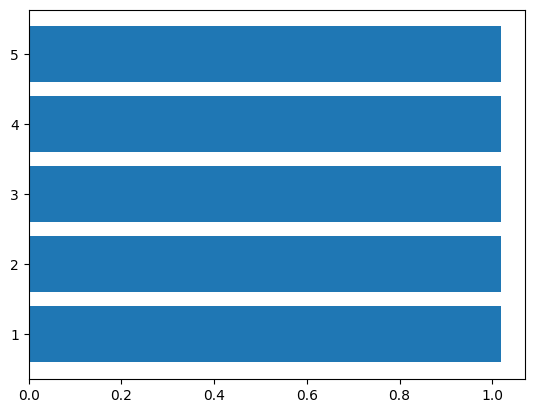

In [44]:
process_array_start = np.array(processes_start)-start
process_array_end = np.array(processes_end)-start
plt.barh(list(range(1,6)),process_array_end)

In [45]:
threads_end_array = []  
while True:
        threads_end = queue2.get()
        if threads_end is None:
            break
        threads_end_array.append(threads_end)

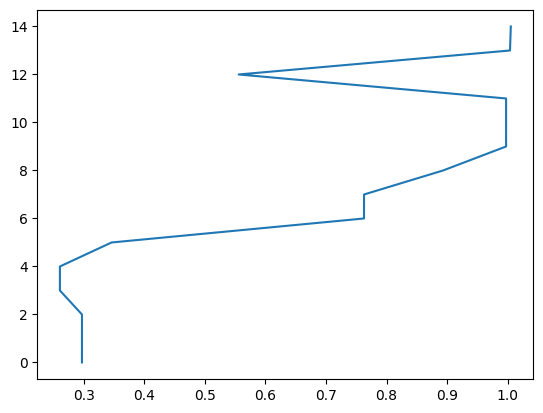

In [46]:
x = (np.array(threads_end_array)-start).reshape(1,15)[0]
y = np.arange(0,15,1)
plt.plot(x,y)